aqui, será coplocado o modelo e respectivamente os resulyado imprimido

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [23]:
df_train = pd.read_csv('train_processado.csv')
df_test = pd.read_csv('test_processado.csv')

aqui, foi colocado o gridsearch para ver os melhores parâmetros 

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 1. Separar features e target
drop_cols = [col for col in ['id', 'situacao_funding'] if col in df_train.columns]
X = df_train.drop(columns=['labels'] + drop_cols)
y = df_train['labels']

# 2. Dividir treino e validação
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Modelo base
rf_base = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'  # importante para dataset desbalanceado
)

# Espaço de hiperparâmetros mais amplo
param_dist = {
    'n_estimators': [200, 500, 800, 1000],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=50,              # número de combinações aleatórias testadas
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Treinar
random_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados:", random_search.best_params_)

# Melhor modelo
best_rf = random_search.best_estimator_


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   1.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=500; total time=   1.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimato

In [25]:
# 1. Separar features e target
drop_cols = [col for col in ['id', 'situacao_funding'] if col in df_train.columns]
X = df_train.drop(columns=['labels'] + drop_cols)
y = df_train['labels']

# 2. Dividir treino e validação
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Instanciar o modelo com os melhores parâmetros
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'  # importante para classes desbalanceadas
)

# 4. Treinar o modelo
best_rf.fit(X_train, y_train)

# 5. Avaliação no conjunto de validação
y_pred = best_rf.predict(X_val)
print("Acurácia:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print("Matriz de confusão:\n", confusion_matrix(y_val, y_pred))


Acurácia: 0.7769230769230769
              precision    recall  f1-score   support

           0       0.73      0.59      0.65        46
           1       0.80      0.88      0.84        84

    accuracy                           0.78       130
   macro avg       0.76      0.73      0.74       130
weighted avg       0.77      0.78      0.77       130

Matriz de confusão:
 [[27 19]
 [10 74]]


In [26]:
# Separar features do conjunto de teste
drop_cols_test = [col for col in ['id', 'situacao_funding', 'labels'] if col in df_test.columns]
X_test = df_test.drop(columns=drop_cols_test)

# Prever os rótulos do conjunto de teste
y_test_pred = best_rf.predict(X_test)

# Salvar para submissão
df_submission = pd.DataFrame({
    'id': df_test['id'],
    'labels': y_test_pred
})
df_submission.to_csv('submission_rf_DECISIVO_CRISTIANO_ROMERO.csv', index=False)
print("Arquivo de submissão salvo como submission_rf.csv")

Arquivo de submissão salvo como submission_rf.csv


age_last_milestone_year       0.125243
relationships                 0.111762
funding_total_usd_log         0.102837
age_first_milestone_year      0.083697
age_last_funding_year         0.075044
age_first_funding_year        0.066004
milestone_duration            0.056744
avg_participants              0.048802
funding_duration              0.045787
avg_participants_per_round    0.045646
milestones_per_year           0.045076
category_code_encoded         0.040803
milestones                    0.032545
funding_rounds                0.029920
is_otherstate                 0.012376
has_roundA                    0.011026
has_roundC                    0.010598
is_CA                         0.010305
has_VC                        0.009810
has_roundB                    0.007507
is_TX                         0.007064
has_angel                     0.005881
is_MA                         0.005528
has_roundD                    0.005245
is_NY                         0.004750
dtype: float64


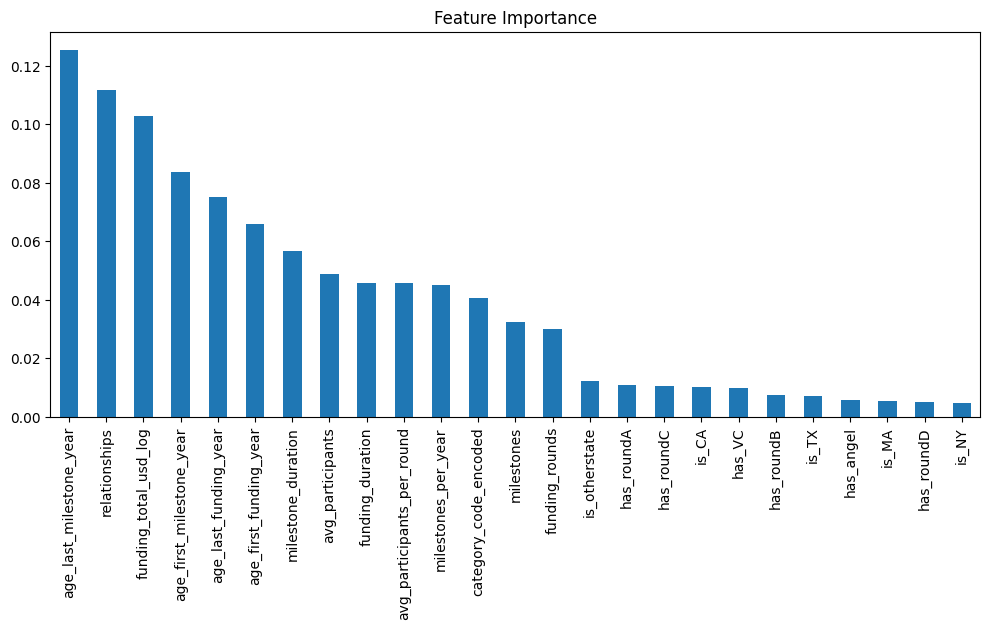

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Treinar RF rápido para avaliar importância
rf_tmp = RandomForestClassifier(random_state=42, n_estimators=200)
rf_tmp.fit(X_train, y_train)

# Importância das features
feat_importances = pd.Series(rf_tmp.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)
print(feat_importances)

# Visualização
plt.figure(figsize=(12,5))
feat_importances.plot(kind='bar')
plt.title("Feature Importance")
plt.show()
